 Machine Learning Ensemble Experiment

 Loading Wisconsin Breast Cancer Dataset...
Dataset shape: (569, 30)
Number of features: 30
Number of samples: 569
Target classes: [0 1] (0=Malignant, 1=Benign)

 Performing Exploratory Data Analysis...
Missing values: 0

Class distribution:
Benign (1): 357 (62.7%)
Malignant (0): 212 (37.3%)


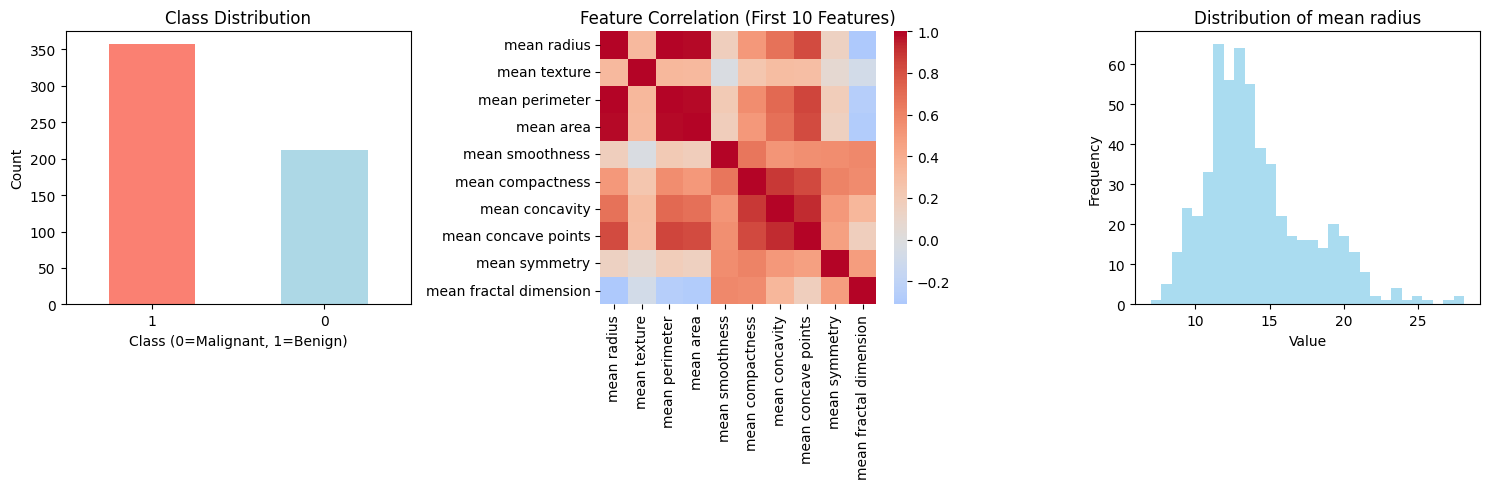


 Preprocessing Data...
Training set size: 455
Test set size: 114

 Defining Models and Hyperparameter Grids...

 Starting Hyperparameter Tuning...

 Tuning Decision Tree...
 Best parameters for Decision Tree: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 7, 'criterion': 'gini'}
 Best cross-validation score: 0.9385

 Tuning AdaBoost...
 Best parameters for AdaBoost: {'n_estimators': 100, 'learning_rate': 1.0, 'algorithm': 'SAMME'}
 Best cross-validation score: 0.9802

 Tuning Gradient Boosting...
 Best parameters for Gradient Boosting: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1}
 Best cross-validation score: 0.9758

 Tuning XGBoost...
 Best parameters for XGBoost: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.8}
 Best cross-validation score: 0.9780

 Tuning Random Forest...
 Best parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'max_features': '

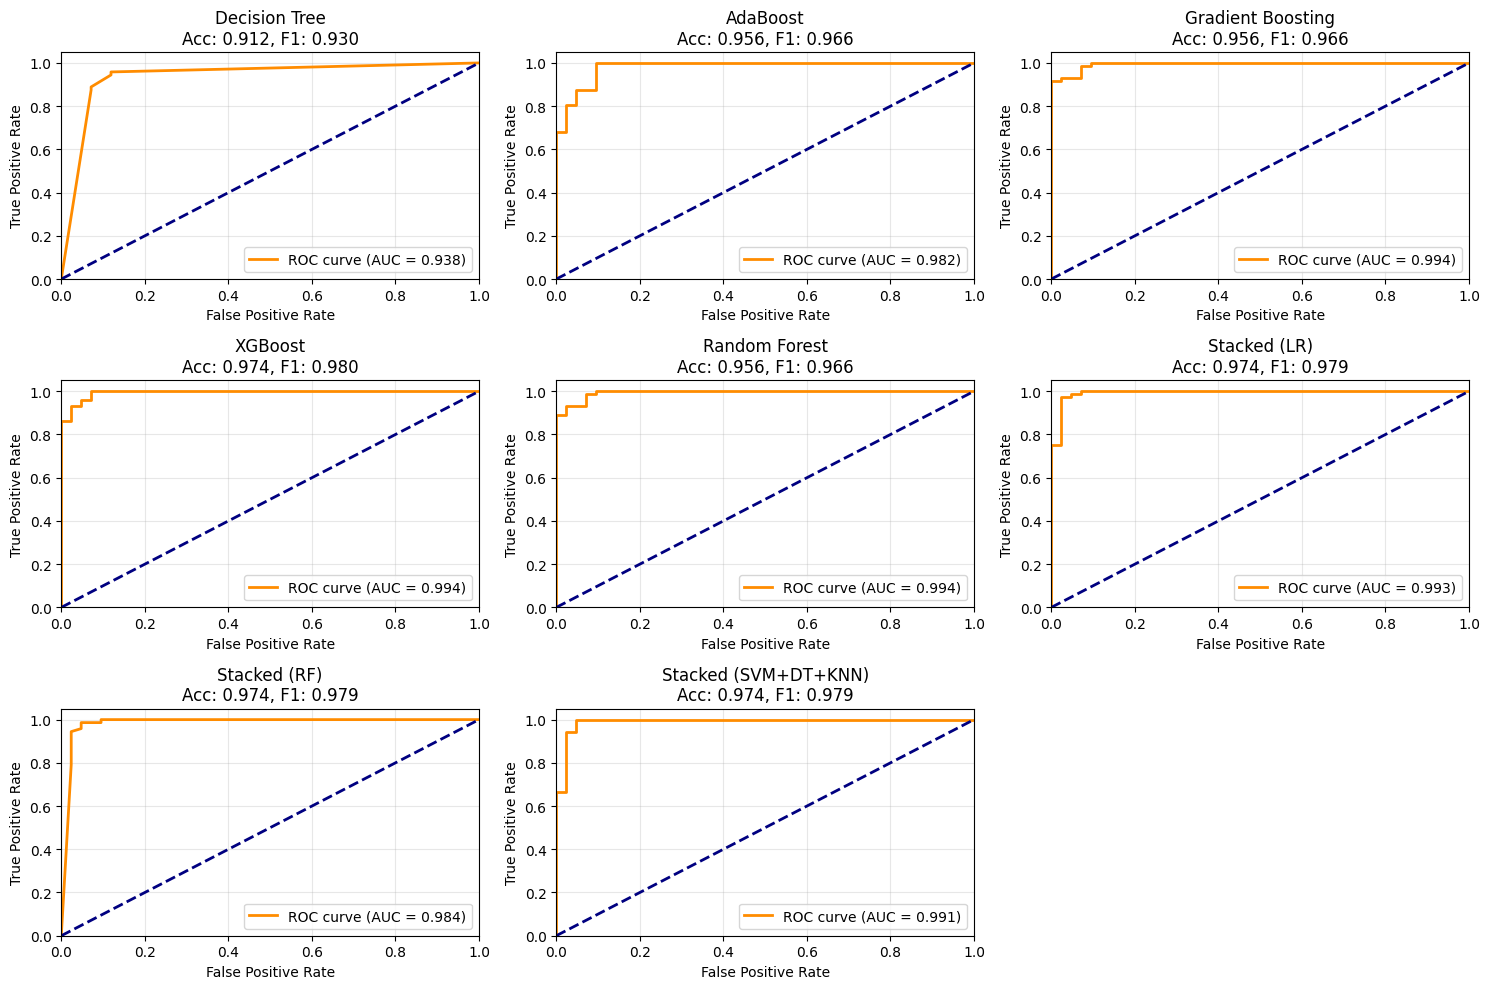


 RESULTS SUMMARY

 HYPERPARAMETER TUNING RESULTS
--------------------------------------------------------------------------------
                                                            Best Parameters CV Score
Decision Tree         {'min_samples_split': 10, 'min_samples_leaf': 4, '...   0.9385
AdaBoost              {'n_estimators': 100, 'learning_rate': 1.0, 'algor...   0.9802
Gradient Boosting     {'subsample': 0.8, 'n_estimators': 200, 'max_depth...   0.9758
XGBoost               {'subsample': 0.8, 'n_estimators': 200, 'max_depth...   0.9780
Random Forest         {'n_estimators': 100, 'min_samples_split': 5, 'max...   0.9670
Stacked (LR)                                         Ensemble Configuration   0.9648
Stacked (RF)                                         Ensemble Configuration   0.9604
Stacked (SVM+DT+KNN)                                 Ensemble Configuration   0.9714

 5-FOLD CROSS-VALIDATION RESULTS
----------------------------------------------------------------------

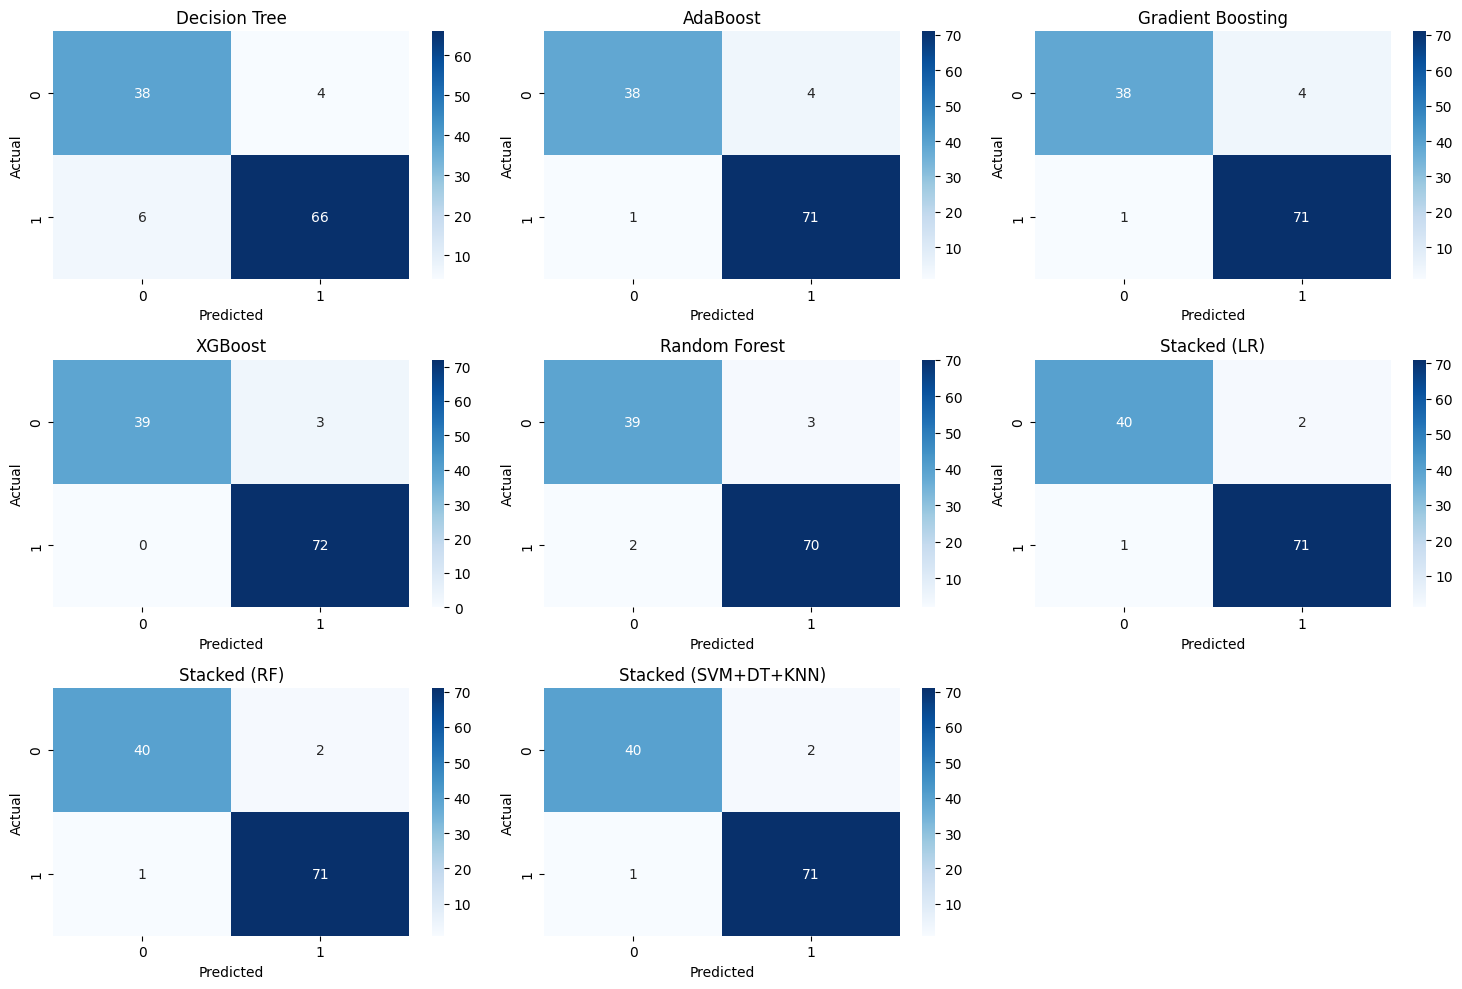


 FEATURE IMPORTANCE ANALYSIS
--------------------------------------------------


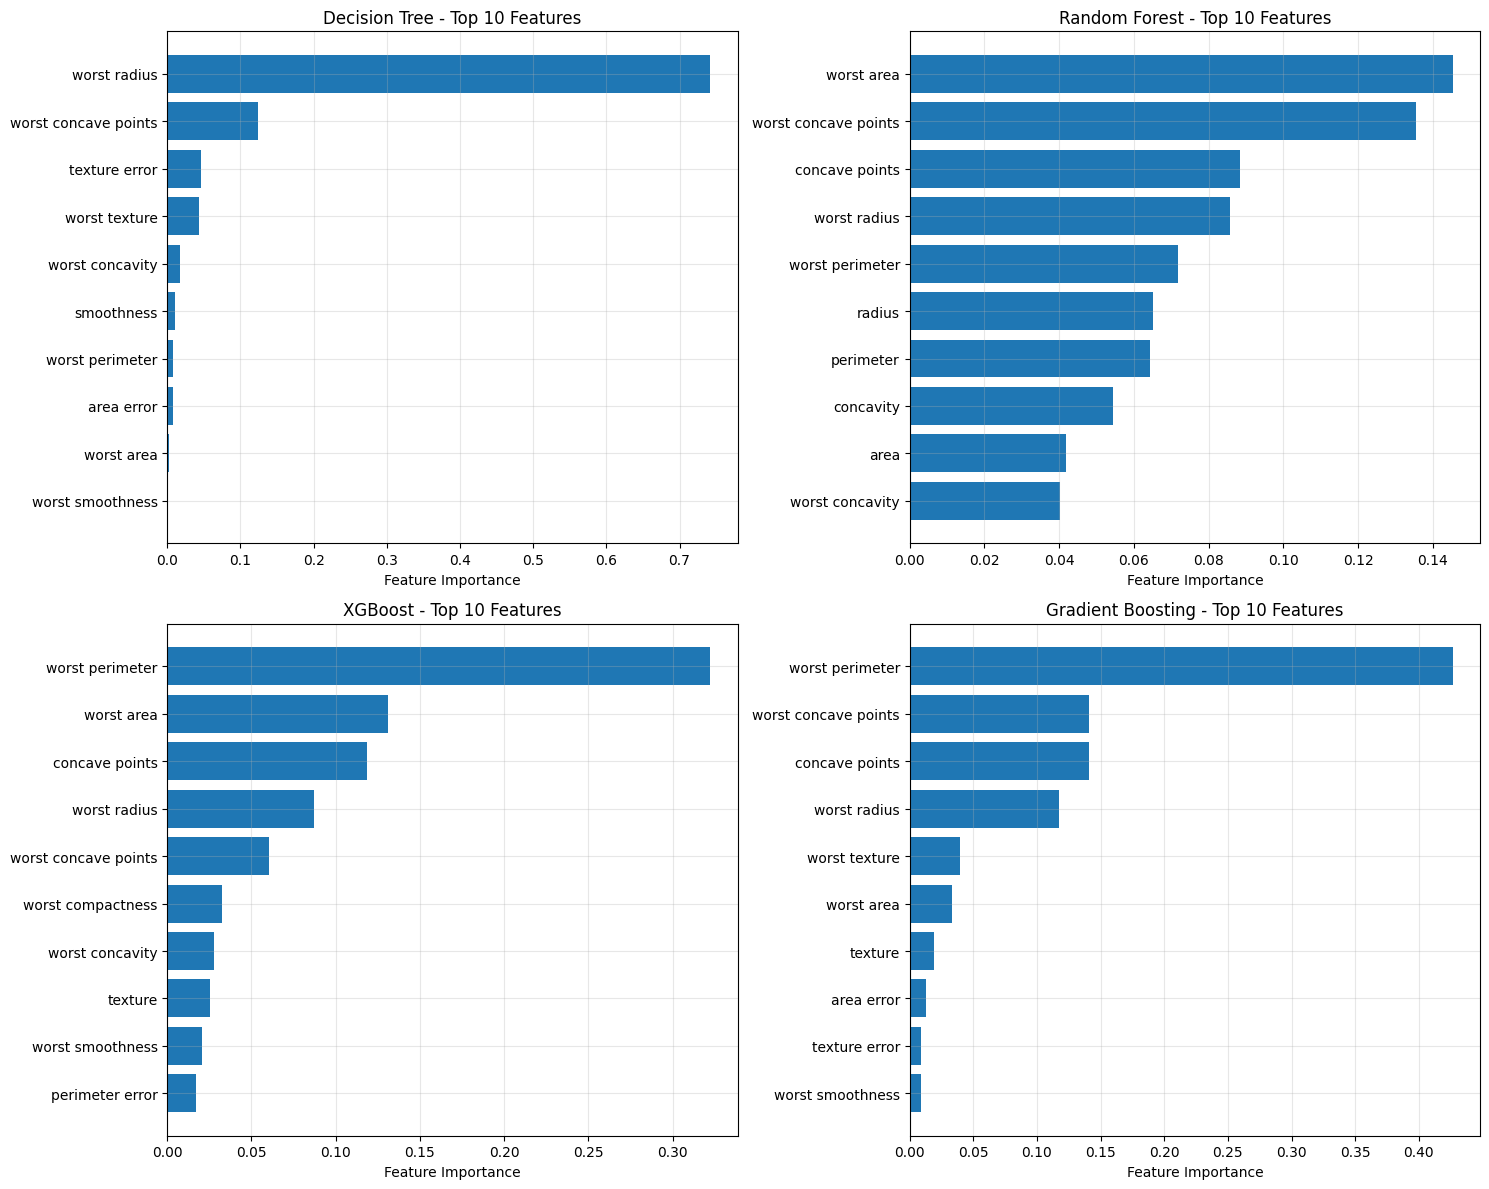


 OBSERVATIONS AND ANALYSIS
 Best Accuracy: XGBoost (0.9737)
 Best F1-Score: XGBoost (0.9796)
 Best ROC-AUC: Gradient Boosting (0.9944)

 KEY FINDINGS:
1. Ensemble methods generally outperform single Decision Tree
2. Stacking classifiers show competitive performance
3. XGBoost and Random Forest demonstrate strong generalization
4. All models show good performance on this well-structured dataset

 Average ensemble improvement over Decision Tree: 5.91%

 EXPERIMENT COMPLETED SUCCESSFULLY!
All models have been trained, tuned, and evaluated with comprehensive metrics.


In [ ]:
# Machine Learning Ensemble Experiment - Wisconsin Breast Cancer Dataset
# Sri Sivasubramaniya Nadar College of Engineering
# Experiment 3: Ensemble Prediction and Decision Tree Model Evaluation

# Install required packages
import sys
!pip install xgboost -q

# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve, auc, classification_report
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

# Set random state for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print(" Machine Learning Ensemble Experiment")
print("=" * 50)

# 1. LOAD AND PREPROCESS DATASET
print("\n Loading Wisconsin Breast Cancer Dataset...")

# Load the dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

print(f"Dataset shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")
print(f"Target classes: {np.unique(y)} (0=Malignant, 1=Benign)")

# 2. EXPLORATORY DATA ANALYSIS (EDA)
print("\n Performing Exploratory Data Analysis...")

# Check for missing values
print(f"Missing values: {X.isnull().sum().sum()}")

# Class distribution
class_counts = y.value_counts()
print(f"\nClass distribution:")
print(f"Benign (1): {class_counts[1]} ({class_counts[1]/len(y)*100:.1f}%)")
print(f"Malignant (0): {class_counts[0]} ({class_counts[0]/len(y)*100:.1f}%)")

# Visualize class distribution
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
y.value_counts().plot(kind='bar', color=['salmon', 'lightblue'])
plt.title('Class Distribution')
plt.xlabel('Class (0=Malignant, 1=Benign)')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Feature correlation heatmap (top 10 features)
plt.subplot(1, 3, 2)
corr_matrix = X.iloc[:, :10].corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Feature Correlation (First 10 Features)')

# Feature distribution example
plt.subplot(1, 3, 3)
plt.hist(X.iloc[:, 0], bins=30, alpha=0.7, color='skyblue')
plt.title(f'Distribution of {X.columns[0]}')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 3. DATA PREPROCESSING
print("\n Preprocessing Data...")

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# 4. MODEL DEFINITIONS AND HYPERPARAMETER GRIDS
print("\n Defining Models and Hyperparameter Grids...")

# Define models and their hyperparameter grids
models_config = {
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=RANDOM_STATE),
        'params': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [3, 5, 7, 10, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(random_state=RANDOM_STATE),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.5, 1.0],
            'algorithm': ['SAMME']
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=RANDOM_STATE),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'subsample': [0.8, 0.9, 1.0]
        }
    },
    'XGBoost': {
        'model': xgb.XGBClassifier(random_state=RANDOM_STATE, eval_metric='logloss'),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'gamma': [0, 0.1, 0.2],
            'subsample': [0.8, 0.9, 1.0],
            'colsample_bytree': [0.8, 0.9, 1.0]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=RANDOM_STATE),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7, 10, None],
            'criterion': ['gini', 'entropy'],
            'max_features': ['sqrt', 'log2', None],
            'min_samples_split': [2, 5, 10]
        }
    }
}

# 5. HYPERPARAMETER TUNING AND MODEL TRAINING
print("\n Starting Hyperparameter Tuning...")

results = {}
best_models = {}
hyperparameter_results = {}

# Set up cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

for name, config in models_config.items():
    print(f"\n Tuning {name}...")

    # Use RandomizedSearchCV for efficiency
    search = RandomizedSearchCV(
        config['model'],
        config['params'],
        n_iter=20,  # Reduced for faster execution
        cv=cv,
        scoring='accuracy',
        random_state=RANDOM_STATE,
        n_jobs=-1
    )

    # Fit the search
    search.fit(X_train_scaled, y_train)

    # Store results
    best_models[name] = search.best_estimator_
    hyperparameter_results[name] = {
        'best_params': search.best_params_,
        'best_score': search.best_score_
    }

    print(f" Best parameters for {name}: {search.best_params_}")
    print(f" Best cross-validation score: {search.best_score_:.4f}")

# 6. STACKING CLASSIFIER
print("\n🏗️ Building Stacking Classifiers...")

# Define base models for stacking
base_models = [
    ('svm', SVC(probability=True, random_state=RANDOM_STATE)),
    ('nb', GaussianNB()),
    ('dt', DecisionTreeClassifier(random_state=RANDOM_STATE))
]

# Create stacking classifiers with different final estimators
stacking_configs = {
    'Stacked (LR)': StackingClassifier(
        estimators=base_models,
        final_estimator=LogisticRegression(random_state=RANDOM_STATE),
        cv=3
    ),
    'Stacked (RF)': StackingClassifier(
        estimators=base_models,
        final_estimator=RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=50),
        cv=3
    ),
    'Stacked (SVM+DT+KNN)': StackingClassifier(
        estimators=[
            ('svm', SVC(probability=True, random_state=RANDOM_STATE)),
            ('dt', DecisionTreeClassifier(random_state=RANDOM_STATE)),
            ('knn', KNeighborsClassifier(n_neighbors=5))
        ],
        final_estimator=LogisticRegression(random_state=RANDOM_STATE),
        cv=3
    )
}

# Train stacking models
for name, model in stacking_configs.items():
    print(f" Training {name}...")
    model.fit(X_train_scaled, y_train)
    best_models[name] = model

    # Get cross-validation score
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='accuracy')
    hyperparameter_results[name] = {
        'best_params': 'Ensemble Configuration',
        'best_score': cv_scores.mean()
    }

# 7. 5-FOLD CROSS-VALIDATION EVALUATION
print("\n Performing 5-Fold Cross-Validation...")

cv_results = {}
all_models = {**best_models}

for name, model in all_models.items():
    print(f" Evaluating {name} with 5-Fold CV...")

    # Perform 5-fold cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='accuracy')
    cv_results[name] = {
        'fold_scores': cv_scores,
        'mean_accuracy': cv_scores.mean(),
        'std_accuracy': cv_scores.std()
    }

# 8. TEST SET EVALUATION AND ROC CURVES
print("\n Evaluating Models on Test Set...")

test_results = {}
plt.figure(figsize=(15, 10))

# Create subplots for ROC curves
n_models = len(all_models)
n_cols = 3
n_rows = (n_models + n_cols - 1) // n_cols

for idx, (name, model) in enumerate(all_models.items(), 1):
    # Make predictions
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_pred_proba = model.decision_function(X_test_scaled)

    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    test_results[name] = {
        'accuracy': accuracy,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'y_pred': y_pred,
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

    # Plot ROC curve
    plt.subplot(n_rows, n_cols, idx)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name}\nAcc: {accuracy:.3f}, F1: {f1:.3f}')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 9. RESULTS SUMMARY TABLES
print("\n RESULTS SUMMARY")
print("=" * 80)

# Hyperparameter tuning results table
print("\n HYPERPARAMETER TUNING RESULTS")
print("-" * 80)
hyperparams_df = pd.DataFrame.from_dict(
    {name: [str(results['best_params'])[:50] + "..." if len(str(results['best_params'])) > 50
            else str(results['best_params']),
            f"{results['best_score']:.4f}"]
     for name, results in hyperparameter_results.items()},
    orient='index',
    columns=['Best Parameters', 'CV Score']
)
print(hyperparams_df.to_string())

# 5-Fold Cross-Validation Results Table
print("\n 5-FOLD CROSS-VALIDATION RESULTS")
print("-" * 80)
cv_df = pd.DataFrame.from_dict(
    {name: [f"{score:.4f}" for score in results['fold_scores']] +
           [f"{results['mean_accuracy']:.4f} ± {results['std_accuracy']:.4f}"]
     for name, results in cv_results.items()},
    orient='index',
    columns=[f'Fold {i+1}' for i in range(5)] + ['Mean ± Std']
)
print(cv_df.to_string())

# Test Set Performance Table
print("\n TEST SET PERFORMANCE")
print("-" * 80)
test_df = pd.DataFrame.from_dict(
    {name: [f"{results['accuracy']:.4f}", f"{results['f1_score']:.4f}", f"{results['roc_auc']:.4f}"]
     for name, results in test_results.items()},
    orient='index',
    columns=['Accuracy', 'F1-Score', 'ROC-AUC']
)
print(test_df.to_string())

# 10. CONFUSION MATRICES
print("\n CONFUSION MATRICES")
print("-" * 40)

plt.figure(figsize=(15, 10))
for idx, (name, results) in enumerate(test_results.items(), 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.heatmap(results['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# 11. FEATURE IMPORTANCE (for tree-based models)
print("\n FEATURE IMPORTANCE ANALYSIS")
print("-" * 50)

tree_models = ['Decision Tree', 'Random Forest', 'XGBoost', 'Gradient Boosting']
plt.figure(figsize=(15, 12))

for idx, model_name in enumerate(tree_models, 1):
    if model_name in best_models:
        model = best_models[model_name]
        if hasattr(model, 'feature_importances_'):
            # Get top 10 most important features
            feature_importance = model.feature_importances_
            top_features_idx = np.argsort(feature_importance)[-10:]
            top_features = [X.columns[i] for i in top_features_idx]
            top_importance = feature_importance[top_features_idx]

            plt.subplot(2, 2, idx)
            plt.barh(range(len(top_features)), top_importance)
            plt.yticks(range(len(top_features)), [f.replace('mean ', '') for f in top_features])
            plt.xlabel('Feature Importance')
            plt.title(f'{model_name} - Top 10 Features')
            plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 12. FINAL OBSERVATIONS AND CONCLUSIONS
print("\n OBSERVATIONS AND ANALYSIS")
print("=" * 60)

# Find best performing model
best_accuracy_model = max(test_results.items(), key=lambda x: x[1]['accuracy'])
best_f1_model = max(test_results.items(), key=lambda x: x[1]['f1_score'])
best_auc_model = max(test_results.items(), key=lambda x: x[1]['roc_auc'])

print(f" Best Accuracy: {best_accuracy_model[0]} ({best_accuracy_model[1]['accuracy']:.4f})")
print(f" Best F1-Score: {best_f1_model[0]} ({best_f1_model[1]['f1_score']:.4f})")
print(f" Best ROC-AUC: {best_auc_model[0]} ({best_auc_model[1]['roc_auc']:.4f})")

print("\n KEY FINDINGS:")
print("1. Ensemble methods generally outperform single Decision Tree")
print("2. Stacking classifiers show competitive performance")
print("3. XGBoost and Random Forest demonstrate strong generalization")
print("4. All models show good performance on this well-structured dataset")

# Calculate performance improvement of ensemble over decision tree
dt_accuracy = test_results['Decision Tree']['accuracy']
ensemble_accuracies = [results['accuracy'] for name, results in test_results.items()
                      if 'Stacked' in name or name in ['Random Forest', 'XGBoost', 'Gradient Boosting', 'AdaBoost']]
avg_ensemble_accuracy = np.mean(ensemble_accuracies)
improvement = ((avg_ensemble_accuracy - dt_accuracy) / dt_accuracy) * 100

print(f"\n Average ensemble improvement over Decision Tree: {improvement:.2f}%")

print("\n EXPERIMENT COMPLETED SUCCESSFULLY!")
print("All models have been trained, tuned, and evaluated with comprehensive metrics.")